In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


Images are 28x28 numpy arrays, with pixel values ranging from 0 to 255.  
The labels are integers that represent a *class* of clothing

|Label|Class|
|---|---|
|0 |	T-shirt/top|
|1 |	Trouser|
|2 |	Pullover|
|3 |	Dress|
|4 |	Coat|
|5 |	Sandal|
|6 |	Shirt|
|7 |	Sneaker|
|8 |	Bag|
|9 |	Ankle boot|

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_labels.shape

(60000,)

There are 60000 images and labels in the training set

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
test_labels.shape

(10000,)

There are 10000 images in the test set.

## Preprocess the Data

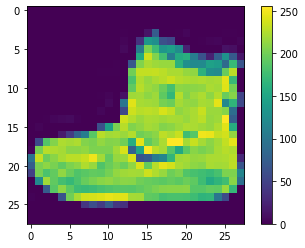

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

This is the typical image of the set. We need to scale it to a range of 0 to 1 before feeding it to the neural network model. 

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Lets plot the same image again:

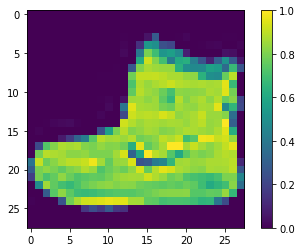

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

good. 

Now let's display more data. 

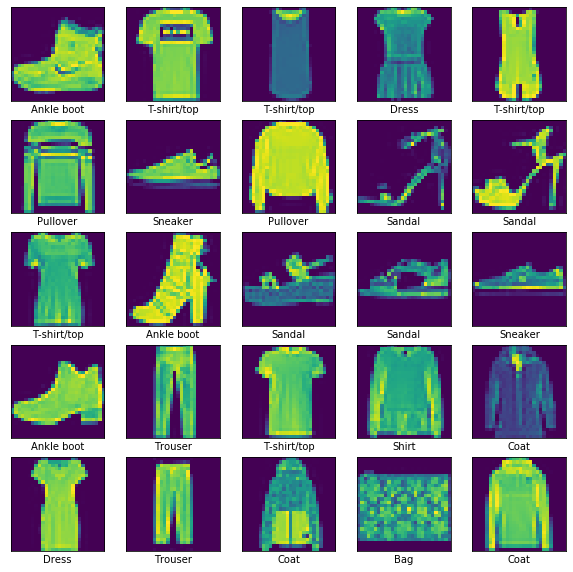

In [22]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) # cmap=plt.cm.binary
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model  

First we need to configure the layers and then compile it.  
The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them.  
Most of deep learning consists of chaining together simple layers.

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

The first layer simply transforms the matrix image into a one-dinmensional array of 28*28 = 784 pixels. This layers has no parameters to learn; it only reformats the data. 

The dense layers are fully connected neural layers.  The second layers is a 10-node *softmax* layer that returns an array of 10 probability scores that sum 1. 

## Compiler the model

We need a few more settings.  

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [24]:
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

## Train the model  
Trining the NN requires the following steps:
1. Feed the training data to the model. 
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set.
4. Verify that the predictions match the labels from the `test_labels` array.

### Feed the model

In [25]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5011 - accuracy: 0.8250
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3768 - accuracy: 0.8634
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3366 - accuracy: 0.8778
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3130 - accuracy: 0.8853
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2942 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2804 - accuracy: 0.8950
Epoch 7/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2677 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2592 - accuracy: 0.9028
Epoch 9/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2472 - accuracy: 0.9069
Epoch 10/10

We have an accuracy of about 91%

### Evaluate accuracy

Now, compare how the model performs on the test dataset:

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3426 - accuracy: 0.8807

Test accuracy: 0.8807


We can see the test accuracy is lower than the training accuracy. This gap between training acc. and test acc. represents *overfitting*. I.e. when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where negatively impacts the performance of the model on the new data. 

### Make predictions  
With the model trained, we can use it to make predictions about some images. The model's linear outputs logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [27]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_images)

Now we have the prediction of each image in the testing set. Let's see:

In [29]:
predictions[0]

array([1.9303020e-06, 1.1611340e-09, 4.8214517e-08, 2.5867889e-08,
       8.4929521e-09, 1.3966650e-04, 7.8399580e-06, 3.8539283e-02,
       1.0712973e-06, 9.6131009e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [32]:
# to compare the prediction with the testing label
test_labels[0]

9

In [37]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([]) 
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

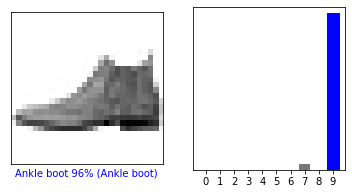

In [38]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

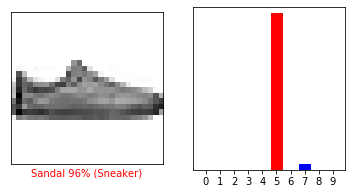

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


Let's plot several images and their predictions. 

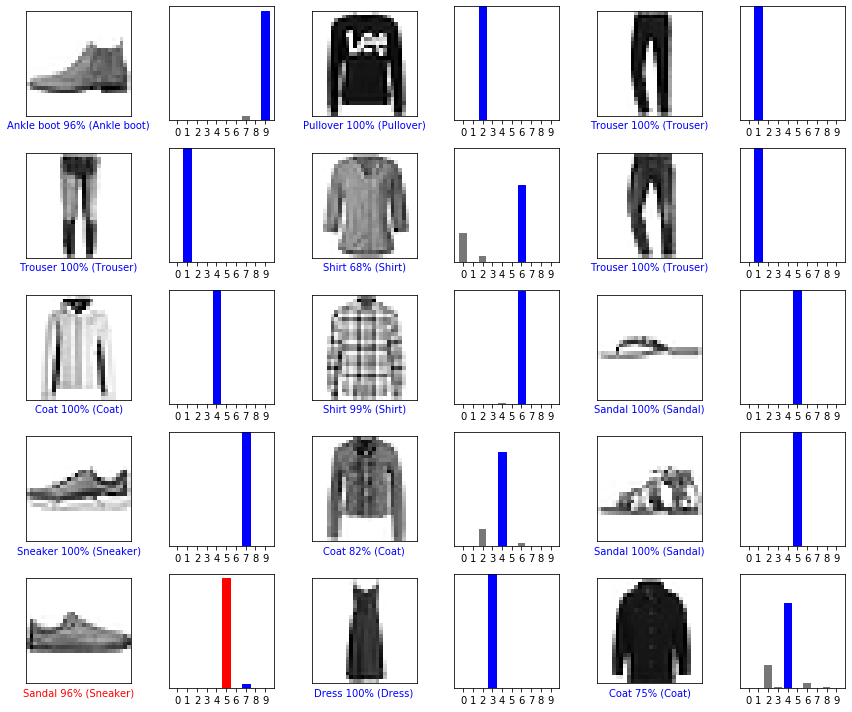

In [41]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

In [42]:
# Grab an image from the test dataset
img = test_images[1]
print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [43]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [44]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.9015319e-04 1.5671500e-13 9.9940586e-01 1.6019314e-10 2.4779540e-04
  1.5588884e-10 1.5622986e-04 4.6841078e-14 3.1276253e-09 1.5039568e-14]]


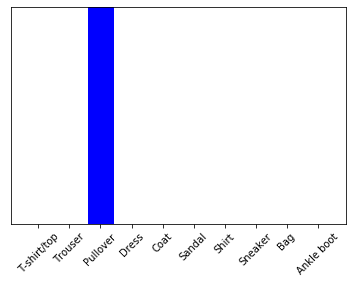

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [46]:
np.argmax(predictions_single[0])

2